In [1]:
using JSON
using Plots
using StatsPlots
using Plots.PlotMeasures
using JLD2

In [2]:
pal = palette(:tab10);

# Load Python Results (CSDI, BRITS, CDREC)

In [9]:
cdrec_results = JSON.parsefile("Python/ipd_cdrec_results.json");
brits_results = JSON.parsefile("Python/ipd_brits_results.json");
csdi_results = JSON.parsefile("Python/ipd_csdi_results.json");

In [10]:
# per fold, per % missing
function extract_fold_pm(results::Dict, fold_idx::Int, pm::Int)
    """
    Extract errors for a given fold and percentage missing.
    Returns pooled errors across window locations, e.g., for 100 test instances,
    each evaluated for 5% missing data and 15 possible window locations,
    will return 1500 errors once pooled.
    """
    fold_marginalised = results["$fold_idx"]
    pm_marginalised = fold_marginalised["$pm"]
    window_iter_marginalised = [pm_marginalised["$i"] for i in 0:(length(pm_marginalised)-1)]
    # pool together results from all the window locs 
    window_pool = window_iter_marginalised[1]
    for i in 2:length(window_iter_marginalised)
        window_pool = vcat(window_pool, window_iter_marginalised[i])
    end
    return window_pool
end

extract_fold_pm (generic function with 1 method)

In [36]:
per_fold_5pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 5)) for f in 0:29])
per_fold_15pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 15)) for f in 0:29])
per_fold_25pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 25)) for f in 0:29])
per_fold_35pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 35)) for f in 0:29])
per_fold_45pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 45)) for f in 0:29])
per_fold_55pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 55)) for f in 0:29])
per_fold_65pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 65)) for f in 0:29])
per_fold_75pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 65)) for f in 0:29])


0.296101084307226

In [41]:
per_pm_mean_all_folds_csdi = [mean([mean(extract_fold_pm(csdi_results, f, pm)) for f in 0:29]) for pm in 5:10:95]
per_pm_std_all_folds_csdi = [std([mean(extract_fold_pm(csdi_results, f, pm)) for f in 0:29]) for pm in 5:10:95]/sqrt(30)
per_pm_95ci_all_folds_csdi = 1.96 * per_pm_std_all_folds_csdi

10-element Vector{Float64}:
 0.027536726736442453
 0.02391344273153571
 0.024501210679629685
 0.023302755612714405
 0.022576333397622914
 0.02180040207067758
 0.020174211762620145
 0.01886677295151247
 0.017583794576869014
 0.018142942899542026

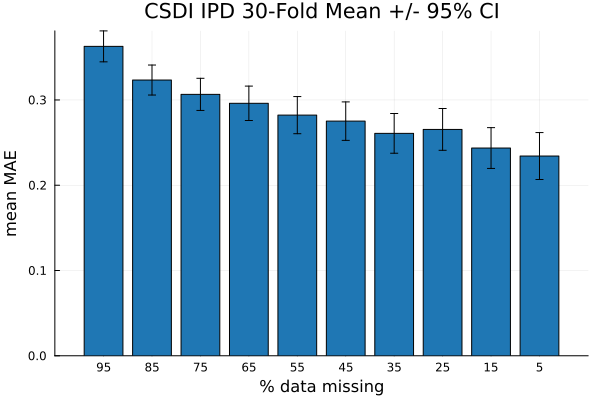

In [45]:
bar(per_pm_mean_all_folds_csdi, yerr=per_pm_95ci_all_folds_csdi, 
    xlabel="% data missing", label="", ylabel="mean MAE",
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    title="CSDI IPD 30-Fold Mean +/- 95% CI", c=pal[1])
xflip!(true)    
#savefig("ipd_csdi_only.svg")

In [46]:
per_pm_mean_all_folds_brits = [mean([mean(extract_fold_pm(brits_results, f, pm)) for f in 0:29]) for pm in 5:10:95]
per_pm_std_all_folds_brits = [std([mean(extract_fold_pm(brits_results, f, pm)) for f in 0:29]) for pm in 5:10:95]/sqrt(30)
per_pm_95ci_all_folds_brits = 1.96 * per_pm_std_all_folds_brits

10-element Vector{Float64}:
 0.013190777384228648
 0.0228044047278619
 0.019125711598482694
 0.020007949088915195
 0.021475764195541158
 0.02305669112981156
 0.026523165330709628
 0.030079073303927534
 0.0326769459125399
 0.03432475300281005

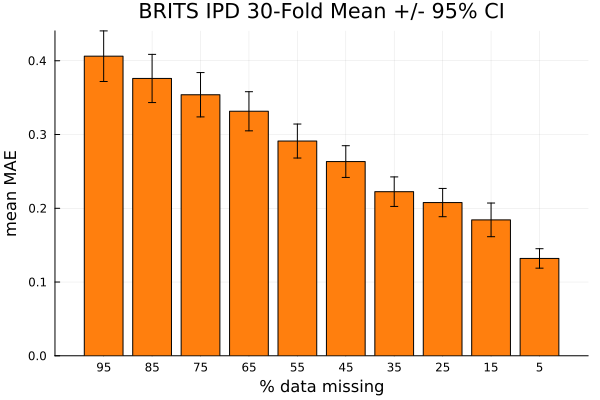

In [49]:
bar(per_pm_mean_all_folds_brits, yerr=per_pm_95ci_all_folds_brits, 
    xlabel="% data missing", label="", ylabel="mean MAE",
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    title="BRITS IPD 30-Fold Mean +/- 95% CI", c=pal[2])
xflip!(true)    
#savefig("ipd_brits_only.svg")

In [50]:
per_pm_mean_all_folds_cdrec = [mean([mean(extract_fold_pm(cdrec_results, f, pm)) for f in 0:29]) for pm in 5:10:95]
per_pm_std_all_folds_cdrec = [std([mean(extract_fold_pm(cdrec_results, f, pm)) for f in 0:29]) for pm in 5:10:95]/sqrt(30)
per_pm_95ci_all_folds_cdrec = 1.96 * per_pm_std_all_folds_cdrec

10-element Vector{Float64}:
 0.016364702036006828
 0.014416094905917153
 0.011973997294424447
 0.012534616834452728
 0.02550564012489755
 0.02998066065918605
 0.03981637223027716
 0.043484232956889475
 0.048857481253196174
 0.06922162426903045

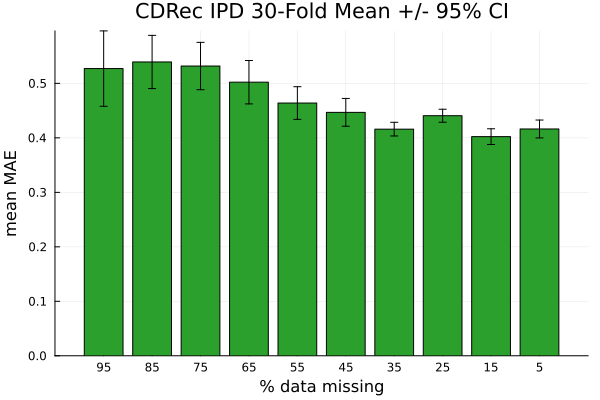

In [54]:
bar(per_pm_mean_all_folds_cdrec, yerr=per_pm_95ci_all_folds_cdrec, 
    xlabel="% data missing", label="", ylabel="mean MAE",
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    title="CDRec IPD 30-Fold Mean +/- 95% CI", c=pal[3])
xflip!(true)    
#savefig("ipd_cdrec_only.svg")

Combined 

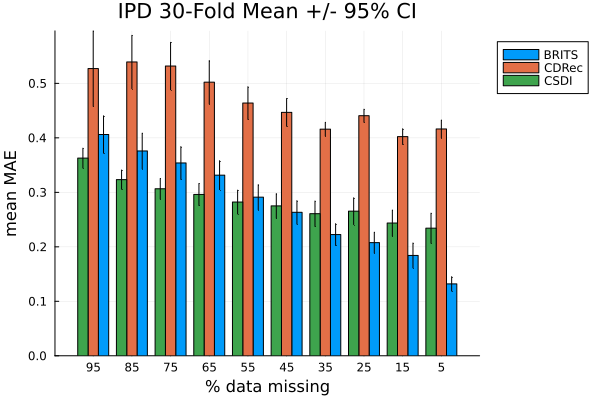

In [58]:
groupedbar([per_pm_mean_all_folds_brits per_pm_mean_all_folds_cdrec per_pm_mean_all_folds_csdi],
    yerr=[per_pm_95ci_all_folds_brits per_pm_95ci_all_folds_cdrec per_pm_95ci_all_folds_csdi],
    markersize=0,
    legend=:outertopright, 
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["BRITS" "CDRec" "CSDI"], 
    title="IPD 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean MAE")
xflip!(true)
#savefig("ipd_combined_impute.svg")

In [60]:
pwd()

"/Users/joshua/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/FinalBenchmarks/ItalyPower"

In [66]:
new_res = jldopen("/Users/joshua/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/inspect_new_ECG2.jld2");
per_fold_mps = read(new_res, "per_fold_mps");
per_fold_nn = read(new_res, "per_fold_nn");

In [169]:
new_res2 = jldopen("/Users/joshua/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/FinalBenchmarks/ECG200/Julia/inspect_new_ECG_cluster.jld2");
per_fold_mps2 = read(new_res2, "per_fold_mps");
per_fold_nn2 = read(new_res2, "per_fold_nn");

In [67]:
fold = 1
pm = 1 # 5% 
c1_mps = (mean([(mean(per_fold_mps[fold][1][i][pm])) for i in 1:36]))
c1_nn = (mean([(mean(per_fold_nn[fold][1][i][pm])) for i in 1:36]))
c2_mps = (mean([(mean(per_fold_mps[fold][2][i][pm])) for i in 1:64]))
c2_nn = (mean([(mean(per_fold_nn[fold][2][i][pm])) for i in 1:64]))
println(c2_mps)

0.18249505191836143


In [173]:
fold = 1
pm = 1 # 5% 
c1_mps = (mean([(mean(per_fold_mps2[fold][1][i][pm])) for i in 1:36]))
c1_nn = (mean([(mean(per_fold_nn2[fold][1][i][pm])) for i in 1:36]))
c2_mps = (mean([(mean(per_fold_mps2[fold][2][i][pm])) for i in 1:64]))
c2_nn = (mean([(mean(per_fold_nn2[fold][2][i][pm])) for i in 1:64]))
println(c2_mps)

0.19550295576369478


In [69]:
println((c1_mps + c2_mps)/2)
println((c1_nn + c2_nn)/2)

0.2245520611413474
0.26718071750090067


In [71]:
JLD2.@load "/Users/joshua/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/FinalBenchmarks/ECG200/Julia/ecg_30_fold_imputation_results_mac3sweep.jld2" mps_results nn_results


2-element Vector{Symbol}:
 :mps_results
 :nn_results

In [75]:
mps_per_pm_30fold = [mean([mean([mean(mps_results[pm][f][inst]) for inst in 1:100]) for f in 1:1]) for pm in 5:10:15]

2-element Vector{Float64}:
 0.21190769806150134
 0.26098316247708

In [3]:
using ITensors

In [10]:
f = jldopen("/Users/joshua/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/FinalBenchmarks/ECG200/cluster_mps.jld2", "r")
cluster_mps = read(f, "mp")
close(f)
f = jldopen("/Users/joshua/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/FinalBenchmarks/ECG200/local_mps.jld2", "r")
local_mps = read(f, "mp")
close(f)

In [11]:
cluster_mps

MPS
[1] ((dim=10|id=131|"Site,n=1"), (dim=10|id=726|"Link,l=1"))
[2] ((dim=10|id=878|"Site,n=2"), (dim=10|id=726|"Link,l=1"), (dim=20|id=498|"Link,l=2"))
[3] ((dim=10|id=771|"Site,n=3"), (dim=20|id=498|"Link,l=2"), (dim=20|id=509|"Link,l=3"))
[4] ((dim=10|id=186|"Site,n=4"), (dim=20|id=509|"Link,l=3"), (dim=20|id=496|"Link,l=4"))
[5] ((dim=10|id=549|"Site,n=5"), (dim=20|id=496|"Link,l=4"), (dim=20|id=589|"Link,l=5"))
[6] ((dim=10|id=385|"Site,n=6"), (dim=20|id=589|"Link,l=5"), (dim=20|id=650|"Link,l=6"))
[7] ((dim=10|id=895|"Site,n=7"), (dim=20|id=650|"Link,l=6"), (dim=20|id=151|"Link,l=7"))
[8] ((dim=10|id=340|"Site,n=8"), (dim=20|id=151|"Link,l=7"), (dim=20|id=882|"Link,l=8"))
[9] ((dim=10|id=992|"Site,n=9"), (dim=20|id=882|"Link,l=8"), (dim=20|id=728|"Link,l=9"))
[10] ((dim=10|id=114|"Site,n=10"), (dim=20|id=728|"Link,l=9"), (dim=20|id=832|"Link,l=10"))
[11] ((dim=10|id=958|"Site,n=11"), (dim=20|id=832|"Link,l=10"), (dim=20|id=54|"Link,l=11"))
[12] ((dim=10|id=411|"Site,n=12"), (dim